# Imports

In [1]:
!pip install nltk pandas

In [2]:
!pip install wordcloud matplotlib

In [3]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from zipfile import ZipFile
import os

In [4]:
nltk.download('movie_reviews')
nltk.download('punkt')  # Для токенизации
nltk.download('stopwords')  # Для стоп-слов
nltk.download('wordnet')  # Для лемматизации
nltk.download('omw-1.4')  # Для поддержки лемматизации

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [5]:
wordnet_zip = '/usr/share/nltk_data/corpora/wordnet.zip'

with ZipFile(wordnet_zip, 'r') as z:
    z.extractall('/usr/share/nltk_data/corpora/')

In [6]:
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [8]:
# Тестирование работы wordnet
synonyms = wordnet.synsets('happy')
print(synonyms[0].definition())

# Тестирование stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

enjoying or showing or marked by joy or pleasure
{"hadn't", 'there', 'and', 'has', 'those', 'do', 'some', 'can', 'then', 'themselves', 'hers', 'their', 'didn', 'after', 'below', 'to', 'was', 'while', 'she', 'of', 'under', 'few', 'no', 'my', "shan't", 'nor', 'will', 'whom', 'were', 'himself', 'y', 'did', 'hadn', 'in', 'above', 'myself', 'd', "mustn't", 'does', "needn't", "haven't", 'most', "wouldn't", 'both', 'wasn', 'any', 'all', 'that', 'the', 'is', 'into', 're', 'we', 'mustn', 's', 'have', 'for', 'between', 've', 'doesn', 'them', 'which', 'off', 'it', "you're", 'about', 'this', 'just', 'own', 'hasn', "you've", "won't", 'don', "couldn't", 'from', 'had', 'up', 'an', 'or', 'how', 'couldn', "shouldn't", 'but', 'been', "don't", 'shan', 'wouldn', 'now', "you'll", 'until', "you'd", 'as', 'down', 'more', "didn't", 'again', 'a', 'ain', 'herself', 'not', 'same', 'yours', "she's", 'i', 'itself', 'what', 'weren', 'with', 'yourself', "mightn't", 'his', 'they', "isn't", 'such', 'ourselves', 'o', '

# WordCloud

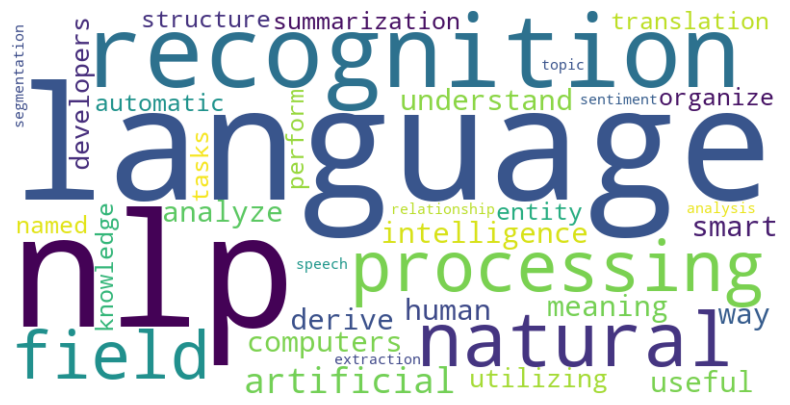

In [9]:
text = """
Natural language processing (NLP) is a field of artificial intelligence in which computers analyze, understand, 
and derive meaning from human language in a smart and useful way. By utilizing NLP, developers can organize 
and structure knowledge to perform tasks such as automatic summarization, translation, named entity recognition, 
relationship extraction, sentiment analysis, speech recognition, and topic segmentation.
"""
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Отключаем оси
plt.show()

# Work with Movie_reviews

In [10]:
# Total reviews
print (len(movie_reviews.fileids()))
# Review categories
print (movie_reviews.categories()) 
# Total positive reviews
print (len(movie_reviews.fileids('pos')))
# Total negative reviews
print (len(movie_reviews.fileids('neg'))) 
positive_review_file = movie_reviews.fileids('pos')[0] 
print (positive_review_file)

2000
['neg', 'pos']
1000
1000
pos/cv000_29590.txt


In [11]:
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [12]:
reviews = []
for cat in movie_reviews.categories():
    for fields in movie_reviews.fileids(cat):
        words = movie_reviews.words(fields)
        reviews.append((list(words), cat))
        
df = pd.DataFrame(reviews, columns = ['review', 'sentiment'])

In [13]:
print(df['sentiment'].value_counts())

sentiment
neg    1000
pos    1000
Name: count, dtype: int64


In [14]:
df.head()

,review,sentiment
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg
2,"[it, is, movies, like, these, that, make, a, j...",neg
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg


## WordsCloud for dataset

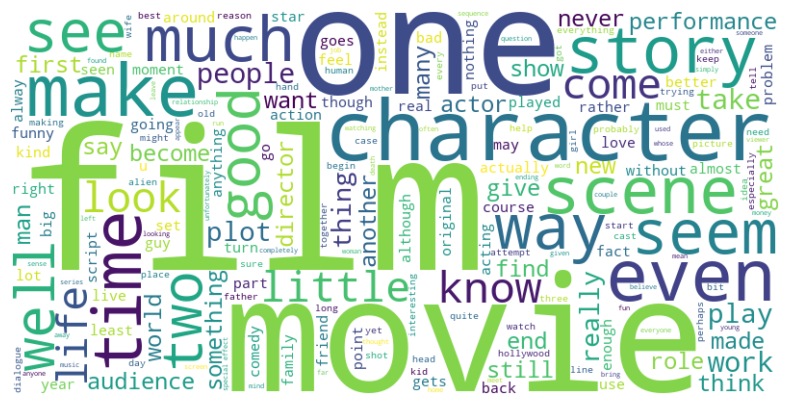

In [15]:
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
text = ' '.join(reviews)
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text.lower())  
filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Отключаем оси для чистоты визуализации
plt.show()

## Continue preprocessing

In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Функция для предобработки текста
def preprocess(tokens):
    # Убираем стоп-слова и оставляем только алфавитно-цифровые токены
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Лемматизация
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Возвращаем очищенный текст в виде строки
    return ' '.join(tokens)

# Применяем предобработку к каждому списку токенов в столбце 'review'
df['cleaned_review'] = df['review'].apply(preprocess)

In [17]:
df.head()

,review,sentiment,cleaned_review
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg,plot two teen couple go church party drink dri...
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg,happy bastard quick movie review damn y2k bug ...
2,"[it, is, movies, like, these, that, make, a, j...",neg,movie like make jaded movie viewer thankful in...
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg,quest camelot warner bros first feature length...
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg,synopsis mentally unstable man undergoing psyc...


# Vectorization

In [18]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment'].map({'pos': 1, 'neg': 0})

# Training

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       199
           1       0.81      0.82      0.81       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [20]:
def predict_sentiment(review):
    cleaned = preprocess(review)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)
    return 'Positive' if prediction == 1 else 'Negative'

print(predict_sentiment("This movie was absolutely fantastic! I loved it."))

Positive
